# The causal impact of capital punishment upon murders
## Is anybody scared of the death penalty?

### Isaac Updike & Ryan Granet



## Introduction

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Of the most controversial issues in criminal justice is capital punishment. The US distinguishes itself among developed democratic nations by sentencing people to death, being surpassed in executions only by China, Iran, Saudi Arabia, Iraq, and Egypt. The justice system administers punishments to convicted criminals with four goals in mind: retribution, incapacitation, deterrence, and rehabilitation. Capital punishment arguably accomplishes incapacitation and retribution, and abandons rehabilitation albeit at a high cost; a human life. Yet the alternative to death sentencing, life sentencing, similarly accomplishes these goals whilst preserving the possibility of rehabilitation.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In considering the viability and ethical implications of capital punishment within the US penal system, one must examine the degree to which it accomplishes the fourth goal, deterrence. Over the last decade, global executions have trended lower. Some believe that the threat of execution for committing certain crimes has been a deterring force. Though, in the United States, we have seen some states abandon capital punishment, even going as far as to rule it unconstitutional. The goal of this paper is to examine the effects of capital punishment in the United States, in an attempt to explain the effectiveness as a policy for deterring murders. According to Levitt (2004), the crime rates throughout the 90s fell sharply due to factors unrelated to capital punishment. Levitt continues to describe that criminals engage in activities that run higher chances of death than being convicted of murder. The higher every-day risks involved with being a criminal means that rational criminals would not be deterred by such low risk of being convicted and executed for their crimes. This paper will use county-level panel data to track murders and executions across 16 years. 


## Methods: Econometrix

The models developed rely on a county level panel dataset consisting of observations from years 1980 through 1996. The dependent variable is murdrate, the number of murders per 10,000 people in a county. The explanatory variable of interest is execrate, the number of executions per 10,000 people in a county. In order to build the model, it was important to understand which factors were going to be left unaccounted for. The relationship between police and the community, the effectiveness of policing and investigating, and the willingness to give information to the police without fear of retaliation are factors that are unmeasured in our data. However, it is assumed that those factors are all important in the success of police arresting suspects and can be grouped into a new variable arrestperc   

The Fixed Effects estimator is a favorable measure of causal effects when working with panel datasets with many time periods. Using such an estimator avoids omitted variable bias by controlling for between group differences using the ‘within’ transformation. This takes the across period average for each


$$ log\text{_}murdrate_{it} = \beta_{0}  + \beta_{1} execrate_{it} + \beta_{2} execrate_{i,t-1} + \beta_{3} execrate_{i,t-2}+  \beta_{4} log\text{_}arrestper_{it} + \beta_{5} arrests_{it} + \beta_{6} arrests2_{it} + \beta_{7} density_{it} + \beta_{8} popul_{it} + \beta_{9} perc1019_{it} + \beta_{10} perc2029_{it} + \beta_{11} percblack_{it} + \beta_{12} percmale_{it} + \beta_{13} percmale*percblack{it} \beta_{14} rpcpersinc_{it} + \beta_{15} rpcunemins_{it} + \beta_{16} rpcincmaint_{it} +  \beta_{15} year{it} + \alpha_{it} + u_{it}$$ 

### Variable descriptions
$ log\text{_}murdrate_{it} $ is the log of murders per 10,000. which is crucial in understanding whether capitol punishment has a detterent effect upon crime since murder is the predominant crime which people are sentenced to death for. 
$ \alpha_{it} $ represents between-group differences in counties, unobserved variables that may contribute to $ log\text{_}murdrate_{it}$ but don't change over time such as culture.
$ u_{it} $ is idiosyncratic error specififc to i,t such as availability of firearms, availability of police officers, or mental health services. Sentencing is way before this all too

**Control Variables**
 
To limit bias in the model, we control for other factors that may influence the decision to murder. $arrests$ indicates the number of arrests involving homicide charges brought against a murder suspect, which could act as a detterent effecct on murder. $ arrestper_{it} $ is the number of arrests as a fraction of the total murders, added to control for the relative efficiency of policing and law enforcment engagement a similar detterent effect. $arrests2_{it}$ is the squared $arrests_{it}$ allows for diminishing effects of arrests. To control for demographic differences across counties we included $density_{it}$ for , persons per square mile,$popul_{it}$ as total population, $perc1019_{it}$ & $perc2029_{it}$ are perecent age 10-19 & 20-29 respectively , $percblack_{it}$ is percent population black, $percmale_{it} $ percent male, and $percmale*percblack{it}$ is an interaction term between the percent black & male variables. $rpcpersinc_{it}$ reports real per capita (RPC) personal income, $ rpcunemins_{it} $ is RPC unemployment insurance, and $rpcincmaint_{it}$ RPC income maintenence, which all serve as proxis for the general welfare, poverty, and social safteynet of a county.  

The measure of capital punishment is the execution rate, reported as $execrate_{it}$. In order to account for a lagging effect of excutions, wherein the news of a convict being executed takes time before it affects the murder rate, the model incorperates the the previous 3 years of execution data at each estimated $\hat{y}$ through $exec. L1$ where the estimated effect of $exec. L1$ at time $t$ is the effect of $exec_{i,t-1}$ on $\hat{y}$.

## Data description

The data in this model comes primarily from 3 sources: DeathPenaltyinfo.org, the Uniform Crime Reports (UCR), U.S. Census Bureau. DeathPenaltyinfo.org is a think-tank centered in Washington DC, focusing on issues concerning capital punishment, they publish data on all executions performed in the United States going back to 1977 by county. The Uniform Crime Reports is a program operated by the FBI to publish administrative data and analysis on law enforcement activity. The U.S. Census Bureau collects population count estimates by city and county every year, and as part of the Current Population Survey collects data about personal income, employment and government benifits. each of these three datasets are indexed by state and county fips and combined in long format such that each row is a list of $y_{it}$ and $X_{it}$.  

While the data include most US counties and for each of the 11 years, there were still only a total of 256 executions. Most death sentences take over a decade to be carried out



In [1]:
import ipystata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

IPyStata is loaded in batch mode.


Load in execution data from [Death Penalty Information Center Exectuion Database](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDMoiJXVldahXzL4S037MGb7DgZMfeqfrR-zYtDJ_U-Sd6FS35W7WU_6N8pXBOm9NOBGIM8BEui37x/pub?gid=0&single=true&output=csv) to attempt to expand dataset


In [2]:
exs = pd.read_csv('data/dpic_exec.csv',usecols = list(range(14))) #

#change dates to datetime format
exs[['Execution Date']] = pd.to_datetime(
    exs.iloc[:,1], infer_datetime_format=True)

exs.rename(columns={"Execution Date": "date"}, inplace =True)
exs['execs'] = np.ones(exs.shape[0])

exs.head(4)

,Execution#,date,First Name,Last Name,Middle Name(s),Suffix,Race,Sex,Region,State,County,Foreign National,Execution Method,Execution Volunteer,execs
0,1,1977-01-17,Gary,Gilmore,Mark,NaN,White,Male,West,Utah,Utah County,Not a Foreign National,Firing Squad,Volunteer,1.0
1,2,1979-05-25,John,Spenkelink,NaN,NaN,White,Male,South,Florida,Leon County,Not a Foreign National,Electrocution,Not a Volunteer,1.0
2,3,1979-10-22,Jesse,Bishop,NaN,NaN,White,Male,West,Nevada,Clark County,Not a Foreign National,Gas,Volunteer,1.0
3,4,1981-03-09,Steven,Judy,NaN,NaN,White,Male,Midwest,Indiana,Morgan County,Not a Foreign National,Electrocution,Volunteer,1.0


total executinos: 1527.0


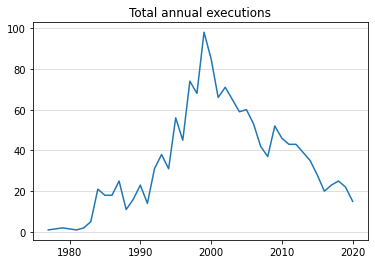

In [55]:
execbyyr = exs.groupby(exs.date.dt.year)['execs'].agg('sum')
log_exec = np.log(execbyyr)
print('total executinos:',sum(execbyyr))

plt.plot(execbyyr)
plt.plot()
plt.title('Total annual executions')
plt.grid(axis='y', alpha=0.5)



## Grab data

In [38]:
df = pd.read_stata('data/countymurders.dta')
df.head(4)

,arrests,countyid,density,popul,perc1019,perc2029,percblack,percmale,rpcincmaint,rpcpersinc,rpcunemins,year,murders,murdrate,arrestrate,statefips,countyfips,execs,lpopul,execrate
0,2.0,1001,54.049999,32216.0,20.629999,15.28,22.330000,40.250000,167.669998,8780.799805,29.160000,1980,2,0.620810,0.620809,1,1,0,10.380219,0.0
1,3.0,1001,53.660000,31984.0,20.190001,15.55,22.070000,40.360001,167.990005,8232.799805,43.919998,1981,1,0.312656,0.937969,1,1,0,10.372991,0.0
2,2.0,1001,53.750000,32036.0,19.660000,15.73,21.799999,40.419998,166.630005,8327.610352,71.410004,1982,3,0.936446,0.624298,1,1,0,10.374616,0.0
3,7.0,1001,53.779999,32056.0,19.100000,15.88,21.530001,40.470001,176.529999,8545.549805,72.220001,1983,7,2.183679,2.183679,1,1,0,10.375239,0.0


Exclude counties without any murders at all

In [40]:
zeros = [] # for data quality testing 

for i in df['countyid'].unique():
    
    cn = df[df['countyid']==i]
    
    if sum(cn['murders'])==0:
        zeros.append(i)
        df.drop(df[df['countyid']==i].index,inplace=True)


In [15]:
#df[df['murders'] == max(df['murders'])]

df[df['arrests'] > df['murders']]

,arrests,countyid,density,popul,perc1019,perc2029,percblack,percmale,rpcincmaint,rpcpersinc,rpcunemins,year,murders,murdrate,arrestrate,statefips,countyfips,execs,lpopul,execrate
1,3.0,1001,53.660000,31984.0,20.190001,15.550000,22.070000,40.360001,167.990005,8232.799805,43.919998,1981,1,0.312656,0.937969,1,1,0,10.372991,0.0
4,3.0,1001,53.910000,32128.0,18.539999,15.920000,21.260000,40.509998,166.250000,8965.160156,40.360001,1984,2,0.622510,0.933765,1,1,0,10.377483,0.0
7,2.0,1001,55.810001,33264.0,17.400000,15.330000,20.490000,40.430000,141.679993,10254.629883,35.200001,1987,1,0.300625,0.601251,1,1,0,10.412231,0.0
9,5.0,1001,57.029999,33992.0,17.020000,14.550000,20.120001,40.459999,156.559998,10844.459961,34.700001,1989,3,0.882561,1.470934,1,1,0,10.433881,0.0
12,5.0,1001,59.660000,35560.0,16.260000,13.960000,20.340000,40.509998,200.350006,11263.969727,49.910000,1992,1,0.281215,1.406074,1,1,0,10.478976,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37267,5.0,56037,4.290000,44712.0,16.049999,19.949999,0.780000,40.980000,45.130001,12703.990234,290.869995,1983,3,0.670961,1.118268,56,37,0,10.707997,0.0
37270,5.0,56037,4.240000,44216.0,16.610001,16.209999,0.760000,40.560001,62.080002,12052.509766,106.820000,1986,4,0.904650,1.130812,56,37,0,10.696842,0.0
37279,3.0,56037,3.907830,40738.0,19.986254,11.704060,0.770779,50.807598,112.832001,14386.080078,52.480000,1995,1,0.245471,0.736413,56,37,0,10.614917,0.0
37293,3.0,56039,3.060000,12276.0,11.440000,14.950000,0.150000,45.130001,39.930000,23686.560547,103.379997,1992,2,1.629195,2.443793,56,39,0,9.415401,0.0


Send the dataframe to stata with the -d command 

Declare the it as panel data to stata with panel/time varibles

Use xtreg, fe to define a linear model using the fixed-effects estimator

In [51]:
%%stata -d df 

describe


Contains data from C:\Users\isaac\.ipython\stata\data_input.dta
  obs:        36,244                          
 vars:            21                          01 Dec 2020 01:15
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
index           long    %12.0g                
arrests         double  %10.0g                
countyid        long    %12.0g                
density         float   %9.0g                 
popul           float   %9.0g                 
perc1019        float   %9.0g                 
perc2029        float   %9.0g         

In [7]:
%%stata -d df

xtset countyid year
xtreg arrests density popul perc1019 perc2029 percblack percmale rpcincmaint rpcpersinc rpcunemins murders murdrate arrestrate execs i.year, fe vce(robust)


       panel variable:  countyid (strongly balanced)
        time variable:  year, 1980 to 1996
                delta:  1 unit

Fixed-effects (within) regression               Number of obs     =     36,842
Group variable: countyid                        Number of groups  =      2,197

R-sq:                                           Obs per group:
     within  = 0.1787                                         min =          7
     between = 0.1198                                         avg =       16.8
     overall = 0.1020                                         max =         17

                                                F(29,2196)        =      51.50
corr(u_i, Xb)  = -0.8006                        Prob > F          =     0.0000

                           (Std. Err. adjusted for 2,197 clusters in countyid)
------------------------------------------------------------------------------
             |               Robust
     arrests |      Coef.   Std. Err.      t    P>|t|     

In [8]:
%%stata -d df

xtset countyid year
xtreg arrests density popul perc1019 perc2029 percblack percmale rpcincmaint rpcpersinc rpcunemins murders murdrate arrestrate execs i.year, fe vce(bootstrap)

'Failed to open Stata'

Regress on *murders*

basic multilinear regression, no lags or additional variables created.

In [9]:
%%stata -d df

# generate new variable
gen arrestperc = arrests / murders

# xtset to set pannel data id and time variables
xtset countyid year

# Regress on murders. Cluster robust FE. No lag variables.
xtreg murders execs arrests density popul perc1019 perc2029 percblack percmale rpcpersinc rpcunemins rpcincmaint execrate i.year, fe vce(cluster countyid)


Unknown #command(15,919 missing values generated)
Unknown #command       panel variable:  countyid (strongly balanced)
        time variable:  year, 1980 to 1996
                delta:  1 unit
Unknown #command
Fixed-effects (within) regression               Number of obs     =     36,842
Group variable: countyid                        Number of groups  =      2,197

R-sq:                                           Obs per group:
     within  = 0.1791                                         min =          7
     between = 0.1031                                         avg =       16.8
     overall = 0.1025                                         max =         17

                                                F(28,2196)        =      11.82
corr(u_i, Xb)  = -0.7273                        Prob > F          =     0.0000

                           (Std. Err. adjusted for 2,197 clusters in countyid)
------------------------------------------------------------------------------
            

Regress on *murders*

Add *arrestperc* variable to explain the effectiveness of policing and community cooperation.

In [10]:
%%stata -d df

# generate new variable
gen arrestperc = arrests / murders

# xtset to set pannel data id and time variables
xtset countyid year

# Regress on murders. Cluster robust FE. No lag variables.
xtreg murders execs arrestperc arrests density popul perc1019 perc2029 percblack percmale rpcpersinc rpcunemins rpcincmaint execrate i.year, fe vce(cluster countyid)


Unknown #command(15,919 missing values generated)
Unknown #command       panel variable:  countyid (strongly balanced)
        time variable:  year, 1980 to 1996
                delta:  1 unit
Unknown #command
Fixed-effects (within) regression               Number of obs     =     21,430
Group variable: countyid                        Number of groups  =      2,120

R-sq:                                           Obs per group:
     within  = 0.1914                                         min =          1
     between = 0.1061                                         avg =       10.1
     overall = 0.1017                                         max =         17

                                                F(29,2119)        =      11.58
corr(u_i, Xb)  = -0.7385                        Prob > F          =     0.0000

                           (Std. Err. adjusted for 2,120 clusters in countyid)
------------------------------------------------------------------------------
            

Regress on *murders*.

Add lag variables for executions.

In [11]:
%%stata -d df

# generate new variable
gen arrestperc = arrests / murders

xtset countyid year
xtreg murders execs L.execs L2.execs L3.execs L4.execs arrestperc arrests density popul perc1019 perc2029 percblack percmale rpcpersinc rpcunemins rpcincmaint execrate i.year, fe vce(cluster countyid)


Unknown #command(15,919 missing values generated)
       panel variable:  countyid (strongly balanced)
        time variable:  year, 1980 to 1996
                delta:  1 unit
> d)

Fixed-effects (within) regression               Number of obs     =     16,121
Group variable: countyid                        Number of groups  =      2,069

R-sq:                                           Obs per group:
     within  = 0.2980                                         min =          1
     between = 0.1152                                         avg =        7.8
     overall = 0.1102                                         max =         13

                                                F(29,2068)        =       9.86
corr(u_i, Xb)  = -0.8904                        Prob > F          =     0.0000

                           (Std. Err. adjusted for 2,069 clusters in countyid)
------------------------------------------------------------------------------
             |               Robust
   

In [43]:
%%stata -d df

# generate new variable
gen arrestperc = arrests / murders

gen execrate2 = execrate * execrate

xtset countyid year
xtreg murders execs L.execs L2.execs L3.execs L4.execs arrestperc arrests density popul perc1019 perc2029 percblack percmale rpcpersinc rpcunemins rpcincmaint execrate execrate2 i.year, fe vce(cluster countyid)


Unknown #command(14,814 missing values generated)
       panel variable:  countyid (strongly balanced)
        time variable:  year, 1980 to 1996
                delta:  1 unit
> er countyid)

Fixed-effects (within) regression               Number of obs     =     16,121
Group variable: countyid                        Number of groups  =      2,069

R-sq:                                           Obs per group:
     within  = 0.2981                                         min =          1
     between = 0.1153                                         avg =        7.8
     overall = 0.1102                                         max =         13

                                                F(30,2068)        =       9.52
corr(u_i, Xb)  = -0.8905                        Prob > F          =     0.0000

                           (Std. Err. adjusted for 2,069 clusters in countyid)
------------------------------------------------------------------------------
             |               

In [48]:
%%stata -d df

# generate new variable
gen arrestperc = arrests / murders

gen execrate2 = execrate * execrate

gen log_rate = log(murdrate)

gen log_exrate = log(execrate)



xtset countyid year
xtreg log_rate log_exrate  L.log_exrate L2.log_exrate L3.log_exrate L4.log_exrate arrestperc arrests density popul perc1019 perc2029 percblack percmale rpcpersinc rpcunemins rpcincmaint execrate i.year, fe vce(cluster countyid)



Unknown #command(14,814 missing values generated)
(14,546 missing values generated)
(36,039 missing values generated)

.        panel variable:  countyid (strongly balanced)
        time variable:  year, 1980 to 1996
                delta:  1 unit
> ear, fe vce(cluster countyid)
note: arrests omitted because of collinearity
note: density omitted because of collinearity
note: popul omitted because of collinearity
note: perc1019 omitted because of collinearity
note: perc2029 omitted because of collinearity
note: percblack omitted because of collinearity
note: percmale omitted because of collinearity
note: rpcpersinc omitted because of collinearity
note: rpcunemins omitted because of collinearity
note: rpcincmaint omitted because of collinearity
note: execrate omitted because of collinearity
note: 1991.year omitted because of collinearity
note: 1992.year omitted because of collinearity
note: 1993.year omitted because of collinearity
note: 1994.year omitted because of collinearity
note: 1